<a href="https://colab.research.google.com/github/am610/machinelearning/blob/master/GW_highres_RF_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### @Ayan Mitra
##### 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import io
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import scipy.fftpack
#import hampel
import random
import sklearn
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sys
import seaborn as sns
from pylab import *
import matplotlib.pyplot as mpl
from scipy import interpolate
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA

column = ['t','orig_w','filt_w','smt_w']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def plot(i):
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',label='%s'%i)
  plt.legend()
  plt.show()
  plt.close()

In [4]:
a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([50], axis=0, inplace=True)
a = a.iloc[:, 1:]
Label= a.iloc[:, -1]


Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]
a = a.iloc[:,:-1]

label0 = []
label1 = []
label2 = []

for i in Label:
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])


In [5]:
T = Time.iloc[:,1500:5500]
S = Signal.iloc[:,1500:5500]

TX = []
TY = []
xnew = pd.Series(np.linspace(-2.0,+6.0,10000, endpoint=True))
for i in range(209):
  tx = T.iloc[i]
  ty = S.iloc[i]
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  ynew = pd.Series(f1(xnew))
  TX.append(xnew)
  TY.append(ynew)
TS = pd.concat([pd.DataFrame(TX),pd.DataFrame(TY)],axis=1)
a = TS

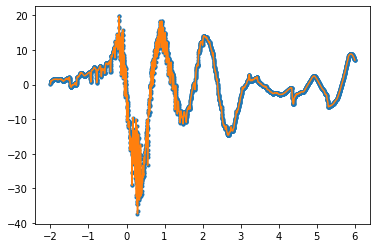

In [6]:
plt.plot(Time.iloc[0,1500:5500],Signal.iloc[0,1500:5500],'.',label='0')
plt.plot(T.iloc[0],S.iloc[0])

#### https://wellsr.com/python/python-pca-examples-with-sklearn/

In [7]:
X = a
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)

25 57 0.8095238095238095
25 58 0.8571428571428571
25 59 0.8095238095238095


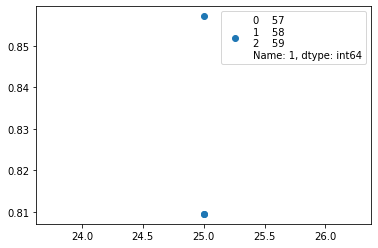

In [24]:
acc = []
for nc in range(25,27):
  for ne in range(57,60):
    pca_model = PCA(n_components=nc) #120
    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test)
    model = RandomForestClassifier(n_estimators=ne, random_state=0) # 100
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    tmp = [nc,ne,accuracy_score(y_test, y_pred)]
    if (accuracy_score(y_test, y_pred)>0.8):
      print(nc,ne,accuracy_score(y_test, y_pred) )
      acc.append(tmp)
acc = pd.DataFrame(acc)
acc2 = acc[(acc[2] > 0.8)]
plt.plot(pd.DataFrame(acc2).iloc[:,0],pd.DataFrame(acc2).iloc[:,2],'o',
         label='%s'%(pd.DataFrame(acc2).iloc[:,1]))
plt.legend() 
#''';   

In [9]:
print(nc,ne,accuracy_score(y_test, y_pred) )

26 59 0.7142857142857143


In [10]:
'''
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
''';

In [11]:
#1e-7+1

In [12]:

#'''
# Doing a basic grid search with preliminary educated guesses as to which range
# PCA and n_estimators were optimum
bestc=0
beste=0
acc = []
for nc in range(25,27):
  for ne in range(57,60):
    #print(nc,ne)
    pca_model = PCA(n_components=nc) #120
    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test)
    model = RandomForestClassifier(n_estimators=ne, random_state=0) # 100
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    #print(nc, ne, accuracy_score(y_test, y_pred) )
    if (accuracy_score(y_test, y_pred)>0.85):
      print(nc, ne, accuracy_score(y_test, y_pred) )
      bestc = nc;beste=ne;
      break
  if nc == bestc and ne == beste:
    break       

25 58 0.8571428571428571


In [13]:
bestc

25

In [14]:
ne

58

In [15]:
pca_data = [bestc,beste]
#np.savetxt("drive/MyDrive/GW_PCA_confi_highres.csv", pca_data)

In [16]:
y_test

array([12, 27, 12, 12, 75, 27, 40, 40, 27, 40, 12, 40, 27, 75, 27, 27, 75,
       12, 27, 12, 75])

In [17]:
y_pred


array([27, 27, 12, 12, 75, 27, 40, 40, 27, 40, 12, 40, 27, 75, 12, 27, 75,
       12, 40, 12, 75])

In [18]:
c = 0
for i in range(21):
  print('s',model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0],'  s',y_test[i])
  ch = model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0]
  if (ch == y_test[i]):
    c +=1
print('%.1f'%(c/i),'Fraction is correct')    

s 27   s 12
s 27   s 27
s 12   s 12
s 12   s 12
s 75   s 75
s 27   s 27
s 40   s 40
s 40   s 40
s 27   s 27
s 40   s 40
s 12   s 12
s 40   s 40
s 27   s 27
s 75   s 75
s 12   s 27
s 27   s 27
s 75   s 75
s 12   s 12
s 40   s 27
s 12   s 12
s 75   s 75
0.9 Fraction is correct


In [19]:
import joblib
filename = 'RF_GW_highres_PCA_model.sav'
#joblib.dump(model,  'drive/MyDrive/'+filename )

In [20]:
#done

# Read data and plot

In [25]:
pca_input = genfromtxt('drive/MyDrive/GW_PCA_confi_highres.csv')
pca_input[0]
bestc = pca_input[0].astype(int)
beste = pca_input[1].astype(int)
filename = 'RF_GW_highres_PCA_model.sav'
loaded_model = joblib.load('drive/MyDrive/'+filename)

#@title
a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([45,55], axis=0, inplace=True)
a = a.iloc[:, 1:]

Label= a.iloc[:, -1]
a = a.iloc[:,:-1]
#print(np.shape(a))
#'''
label0 = []
label1 = []
label2 = []
for i in Label:
    #print(i[1:3])
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])
X = a
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)

pca_model = PCA(n_components=pca_input[0].astype(int))
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([50], axis=0, inplace=True)
a = a.iloc[:, 1:]
Label= a.iloc[:, -1]
a = a.iloc[:,:-1]
Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]

#print(np.shape(a))
#'''
label0 = []
label1 = []
label2 = []
for i in Label:
    #print(i[1:3])
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])

T = Time.iloc[:,1500:5500]
S = Signal.iloc[:,1500:5500]
TS = pd.concat([T,S],axis=1)
#print(TS)
gap = np.linspace(0,7999,8000).astype(int)
TS.columns = gap
a = TS

#----------
TX = []
TY = []
xnew = pd.Series(np.linspace(-2.0,+6.0,10000, endpoint=True))
for i in range(209):
  tx = T.iloc[i]
  ty = S.iloc[i]
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  ynew = pd.Series(f1(xnew))
  TX.append(xnew)
  TY.append(ynew)
TS = pd.concat([pd.DataFrame(TX),pd.DataFrame(TY)],axis=1)
a = TS    
X = a
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)

pca_model = PCA(n_components=pca_input[0].astype(int))
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

y_pred = loaded_model.predict(X_test_pca)
y_pred_train = loaded_model.predict(X_train_pca)


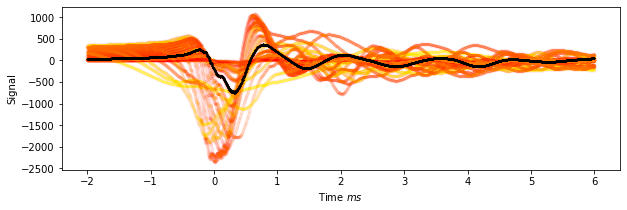

Text(0, 0.5, 'GW-Signal')

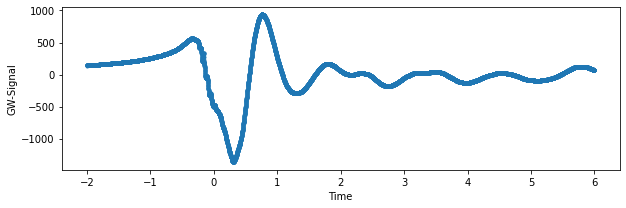

In [32]:
Time = a.iloc[:,:10000]

Signal = a.iloc[:, 10000:]

i = 4
plt.rcParams['figure.figsize'] = [10,3]

for j in range(30):
    plt.plot(Time.iloc[j],Signal.iloc[j],'.',color = (1, j / 30.0, 0, 0.5),alpha=0.009)
#plt.xlim(-1,1)
plt.plot(Time.iloc[i],Signal.iloc[i],'.',c='black',markersize=1)
plt.xlabel('Time $ms$')
plt.ylabel('Signal')
#plt.grid()
plt.show()

plt.plot(Time.iloc[10],Signal.iloc[101],'.')
plt.xlabel('Time')
plt.ylabel('GW-Signal')

In [27]:
model = loaded_model
c = 0
for i in range(21):
  print('s',model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0],'  s',y_test[i])
  ch = model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0]
  if (ch == y_test[i]):
    c +=1
print('%.1f'%(c/i),'Fraction is correct')   

print('F1 accuracy: %.1f'%(f1_score(y_pred, y_test, average='macro')))

print(loaded_model.classes_)

s 27   s 12
s 27   s 27
s 12   s 12
s 12   s 12
s 75   s 75
s 27   s 27
s 40   s 40
s 40   s 40
s 27   s 27
s 40   s 40
s 12   s 12
s 40   s 40
s 27   s 27
s 75   s 75
s 12   s 27
s 27   s 27
s 75   s 75
s 12   s 12
s 40   s 27
s 12   s 12
s 75   s 75
0.9 Fraction is correct
F1 accuracy: 0.9
[12 27 40 75]


In [28]:
#@title
import sklearn.metrics as skm
print('----------------')
print('Test Data ')
print('----------------')
print(skm.classification_report( y_test , y_pred ))
print('----------------')
print('Train Data')
print('----------------')
print(skm.classification_report( y_train , y_pred_train ))

----------------
Test Data 
----------------
              precision    recall  f1-score   support

          12       0.83      0.83      0.83         6
          27       0.83      0.71      0.77         7
          40       0.80      1.00      0.89         4
          75       1.00      1.00      1.00         4

    accuracy                           0.86        21
   macro avg       0.87      0.89      0.87        21
weighted avg       0.86      0.86      0.85        21

----------------
Train Data
----------------
              precision    recall  f1-score   support

          12       1.00      1.00      1.00        46
          27       1.00      1.00      1.00        45
          40       1.00      1.00      1.00        49
          75       1.00      1.00      1.00        48

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



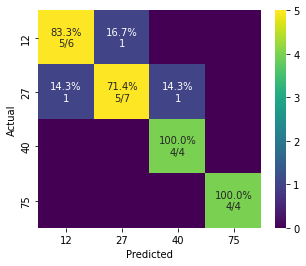

In [29]:
#@title
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(4,4)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="viridis")
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, loaded_model.classes_, ymap=None, figsize=(5,4))